The wonderful Pandas library offers a list of functions, among which a function called pivot_table is used to summarize a feature’s values in a neat two-dimensional table. 

The pivot table is similar to the dataframe.groupby() function in Pandas. 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
/df=pd.read_csv("titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


###### How to Group Data Using Index in a Pivot Table?

pivot_table requires <b>data, and an index parameter </b> 

<b>data is the Pandas dataframe</b> you pass to the function.

<b>index is the feature that allows you to group your data</b>. 

The index feature will appear as an index in the resultant table. 

Generally, <i> categorical columns are used as indexes </i>

In [3]:
table = pd.pivot_table(df,index=['Sex','Pclass'],aggfunc={'Age':np.mean,'Survived':np.sum})
table

Age  Survived
Sex    Pclass                     
female 1       34.611765        91
       2       28.722973        70
       3       21.750000        72
male   1       41.281386        45
       2       30.740707        17
       3       26.507589        47

aggfunc() is an aggregate function that pivot_table applies to grouped data.

Just provide a <b>dictionary as an input to the aggfunc parameter with the feature name as the key and the corresponding aggregate function as the value</b>.

Aggregate on Specific Features With Values Parameter

The <b>value parameter tells the function which features to aggregate on</b>. 

In [4]:
table = pd.pivot_table(df,index=['Sex','Pclass'],values=['Survived'], aggfunc=np.mean)
table

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

<Axes: xlabel='Sex,Pclass'>

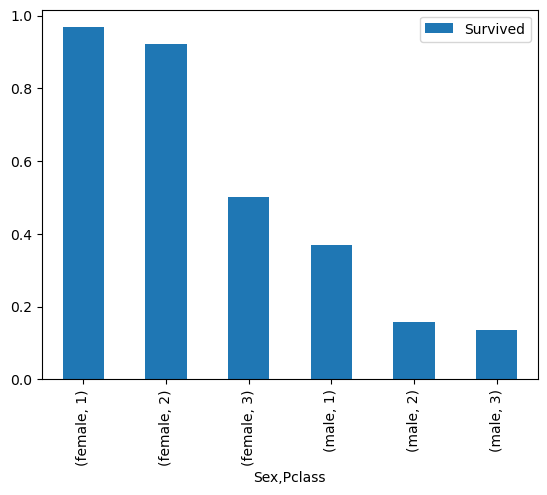

In [5]:
table.plot(kind='bar')

The columns parameter is optional and displays the values horizontally on the top of the resultant table. 

Both columns and the index parameters are optional, but using them effectively will help you to intuitively understand the relationship between the features.

In [6]:
table = pd.pivot_table(df,index=['Sex'],columns=['Pclass'],values=['Survived'],aggfunc=np.sum)
table

Survived        
Pclass        1   2   3
Sex                    
female       91  70  72
male         45  17  47

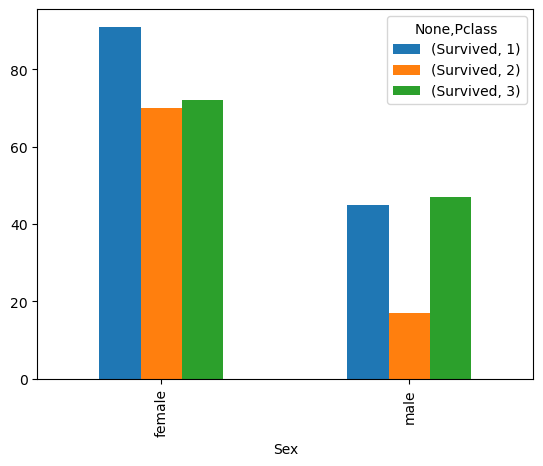

In [7]:
table.plot(kind='bar');

Handling Missing Data

pivot_table even allows you to deal with the missing values through the parameters dropna and fill_value:

dropna allows you to drop the null values in the grouped table whose all values are null 
fill_value parameter can be used to replace the NaN values in the grouped table with the values that you provide here

In [8]:
table = pd.pivot_table(df,index=['Sex','Survived','Pclass'],columns=['Embarked'],values=['Age'],aggfunc=np.mean)
table

Age                      
Embarked                        C          Q          S
Sex    Survived Pclass                                 
female 0        1       50.000000        NaN  13.500000
                2             NaN        NaN  36.000000
                3       20.700000  28.100000  23.688889
       1        1       35.675676  33.000000  33.619048
                2       19.142857  30.000000  29.091667
                3       11.045455  17.600000  22.548387
male   0        1       43.050000  44.000000  45.362500
                2       29.500000  57.000000  33.414474
                3       27.555556  28.076923  27.168478
       1        1       36.437500        NaN  36.121667
                2        1.000000        NaN  17.095000
                3       18.488571  29.000000  22.933333

In [9]:
table = pd.pivot_table(df,index=['Sex','Survived','Pclass'],columns=['Embarked'],values=['Age'],aggfunc=np.mean,fill_value=np.mean(df['Age']))
table

Age                      
Embarked                        C          Q          S
Sex    Survived Pclass                                 
female 0        1       50.000000  29.699118  13.500000
                2       29.699118  29.699118  36.000000
                3       20.700000  28.100000  23.688889
       1        1       35.675676  33.000000  33.619048
                2       19.142857  30.000000  29.091667
                3       11.045455  17.600000  22.548387
male   0        1       43.050000  44.000000  45.362500
                2       29.500000  57.000000  33.414474
                3       27.555556  28.076923  27.168478
       1        1       36.437500  29.699118  36.121667
                2        1.000000  29.699118  17.095000
                3       18.488571  29.000000  22.933333

<b>Crosstabs, also known as crosstabulation tables, are a type of table used to summarize the relationship between two categorical variables</b>
-
They display the frequency of observations that fall into each combination of categories for the two variables. 

Crosstabs can be used to identify patterns or relationships between variables, and to test hypotheses about those relationships.

Differences between Crosstabs and Pivot Tables
---------------------------------------------------------------------

Data Types: Crosstabs are used for categorical data, while pivot tables can be used for both categorical and numerical data. 

Crosstabs are used to analyze the relationship between two categorical variables, while pivot tables can analyze the relationships between multiple variables, both categorical and numerical.

In [10]:
import pandas as pd
data=pd.read_csv("loanpredict.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


#### Boolean Indexing in Pandas

In [11]:
data.loc[(data["Gender"]=="Female") & (data["Education"]=="Not Graduate") & (data["Loan_Status"]=="Y"), ["Gender","Education","Loan_Status"]]

,Gender,Education,Loan_Status
50,Female,Not Graduate,Y
197,Female,Not Graduate,Y
205,Female,Not Graduate,Y
279,Female,Not Graduate,Y
403,Female,Not Graduate,Y
407,Female,Not Graduate,Y
439,Female,Not Graduate,Y
463,Female,Not Graduate,Y
468,Female,Not Graduate,Y
480,Female,Not Graduate,Y


#### Pandas Crosstab

This function is used to get an initial “feel” (view) of the data. 

“Credit_History” is expected to affect the loan status significantly. 

This can be tested using cross-tabulation as shown below:

In [12]:
pd.crosstab(data["Credit_History"],data["Loan_Status"],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [13]:
def percConvert(ser):
    return ser/float(ser[-1])

pd.crosstab(data["Credit_History"],data["Loan_Status"],margins=True).apply(percConvert, axis=1)

Loan_Status,N,Y,All
Credit_History,,,
0.0,0.921348,0.078652,1.0
1.0,0.204211,0.795789,1.0
All,0.317376,0.682624,1.0


##### Coding nominal data using Pandas

In [16]:
#Define a generic function using Pandas replace function

def coding(col, codeDict):
    colCoded = pd.Series(col, copy=True)
    
    for key, value in codeDict.items():
        colCoded.replace(key, value, inplace=True)
    return colCoded

In [17]:
#Coding LoanStatus as Y=1, N=0:

print ('Before Coding:')

print (pd.value_counts(data["Loan_Status"]))
data["Loan_Status_Coded"] = coding(data["Loan_Status"], {'N':0,'Y':1})


Before Coding:
Loan_Status
Y    422
N    192
Name: count, dtype: int64


In [18]:

print ('\nAfter Coding:')
print (pd.value_counts(data["Loan_Status_Coded"]))



After Coding:
Loan_Status_Coded
1    422
0    192
Name: count, dtype: int64


In [ ]:
data

#### Binning 

Data binning (or bucketing) groups data in bins (or buckets), in the sense that it replaces values contained into a small interval with a single representative value for that interval. 

Sometimes binning improves accuracy in predictive models.

Data binning is a type of data preprocessing, a mechanism which includes also dealing with missing values, formatting, normalization and standardization.

Binning can be applied to convert numeric values to categorical or to sample (quantise) numeric values.

convert numeric to categorical includes binning by distance and binning by frequency reduce numeric values includes quantisation (or sampling).

Binning is a technique for data smoothing. 

Data smoothing is employed to remove noise from data. Three techniques for data smoothing:

binning, regression, outlier analysis.

In [19]:
import pandas as pd
df = pd.read_csv('cupcake.csv')
df

,Month,Cupcake
0,2004-01,6
1,2004-02,6
2,2004-03,5
3,2004-04,6
4,2004-05,6
...,...,...
229,2023-02,41
230,2023-03,38
231,2023-04,39
232,2023-05,41


In [20]:
min_value = df['Cupcake'].min()
max_value = df['Cupcake'].max()
print(min_value)
print(max_value)

5
100


In [21]:
labels = ['small', 'medium', 'big']

We can use the cut() function to convert the numeric values of the column Cupcake into the categorical values. 

We need to specify the bins and the labels. 

In addition, we set the parameter include_lowest to True in order to include also the minimum value.

In [22]:
df['bins'] = pd.cut(df['Cupcake'], bins=3, labels=labels, include_lowest=True)

In [23]:
df

,Month,Cupcake,bins
0,2004-01,6,small
1,2004-02,6,small
2,2004-03,5,small
3,2004-04,6,small
4,2004-05,6,small
...,...,...,...
229,2023-02,41,medium
230,2023-03,38,medium
231,2023-04,39,medium
232,2023-05,41,medium


In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['bins'], bins=3)